In [7]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pickle
import math
from sklearn.datasets import make_classification

## Part 1 - Linear Regression

### Problem 1 - Linear Regression with Direct Minimization

In [3]:
print('PROBLEM 1')
print('----------')

PROBLEM 1
----------


In [4]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    trans_X = X.T
    XTX = np.matmul(trans_X, X)
    inverse = np.linalg.inv(XTX)
    new_X = np.matmul(inverse, trans_X)
    w = np.matmul(new_X, y)
    return w

In [5]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # rmse = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    N = Xtest.shape[0]
    jw = 0
    wt=w.T
    for i in range(0, N-1):
        lhs = ytest[i]
        xi=Xtest[i]
        xi=xi[:,np.newaxis]
        rhs =np.matmul(wt,xi)
        jw = jw + math.pow(lhs - rhs, 2)
    rmse = math.sqrt(1/Xtest.shape[0] * jw)
    return rmse

In [8]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
x1 = np.ones((len(Xtrain),1))
x2 = np.ones((len(Xtest),1))

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(Xtrain,ytrain)
w_i = learnOLERegression(Xtrain_i,ytrain)

rmse = testOLERegression(w,Xtrain,ytrain)
rmse_i = testOLERegression(w_i,Xtrain_i,ytrain)
print('RMSE without intercept on train data - %.2f'%rmse)
print('RMSE with intercept on train data - %.2f'%rmse_i)

rmse = testOLERegression(w,Xtest,ytest)
rmse_i = testOLERegression(w_i,Xtest_i,ytest)
print('RMSE without intercept on test data - %.2f'%rmse)
print('RMSE with intercept on test data - %.2f'%rmse_i)


RMSE without intercept on train data - 137.98
RMSE with intercept on train data - 46.50
RMSE without intercept on test data - 325.71
RMSE with intercept on test data - 60.89


### Problem 2 - Linear Regression with Gradient Descent

In [71]:
print('PROBLEM 2')
print('----------')

PROBLEM 2
----------


In [9]:
def regressionObjVal(w, X, y):

    # compute squared error (scalar) with respect
    # to w (vector) for the given data X and y      
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    n = X.shape[0]
    sum = 0
    for i in range(1, n):
        rhs = np.matmul(w.T, X[i])
        sum = sum + math.pow(y[i] - rhs, 2)
    error = 1/2 * sum
    return error


In [12]:
def regressionGradient(w, X, y):

    # compute gradient of squared error (scalar) with respect
    # to w (vector) for the given data X and y   
    
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # gradient = d length vector (not a d x 1 matrix)

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE 

    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    _x = np.matmul(X.T, X)
    lhs = np.matmul(_x, w)
    rhs = np.matmul(X.T, y)
    retval = lhs - rhs
    error_grad = retval.reshape(-1)
    return error_grad

In [13]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
rmse = testOLERegression(w,Xtrain_i,ytrain)
print('Gradient Descent Linear Regression RMSE on train data - %.2f'%rmse)
rmse = testOLERegression(w,Xtest_i,ytest)
print('Gradient Descent Linear Regression RMSE on test data - %.2f'%rmse)

Gradient Descent Linear Regression RMSE on train data - 48.65
Gradient Descent Linear Regression RMSE on test data - 53.89


## Part 2 - Linear Classification

### Problem 3 - Perceptron using Gradient Descent

In [184]:
print('PROBLEM 3')
print('----------')

PROBLEM 3
----------


In [14]:
def predictLinearModel(w,Xtest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # Output:
    # ypred = N x 1 vector of predictions

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    n = Xtest.shape[0]
    ypred = np.zeros([Xtest.shape[0], 1])
    wt=w.T
    for i in range(n):
        xi=Xtest[i,:]
        xi=xi[:,np.newaxis]
        check = np.matmul(wt, xi)
        if check < 0:
            ypred[i] = -1
        elif check >= 0:
            ypred[i] = 1
    return ypred

In [15]:
def evaluateLinearModel(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # acc = scalar values

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    acc = 0
    n = Xtest.shape[0]
    ypred=predictLinearModel(w, Xtest)
    for i in range(n):
        if(ypred[i]==ytest[i]):
            acc+=1
    ret = acc/n 
    return acc

In [16]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Perceptron Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Perceptron Accuracy on test data - %.2f'%acc)

Perceptron Accuracy on train data - 84.00
Perceptron Accuracy on test data - 84.00


### Problem 4 - Logistic Regression Using Newton's Method

In [221]:
print('PROBLEM 4')
print('----------')

PROBLEM 4
----------


In [17]:
def logisticObjVal(w, X, y):

    # compute log-loss error (scalar) with respect
    # to w (vector) for the given data X and y                               
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar
    
    
    w = w[:, np.newaxis]
    n = X.shape[0]
    error = 0
    sum = 0

    for i in range(n):
        yi = y[i]
        yi = yi[:, np.newaxis]
        wt = w.T
        xi = X[i, :]
        xi = xi[:, np.newaxis]
        val = np.matmul(yi, wt)
        e_val = np.matmul(val, xi)
        log_val = np.log(1 + math.exp(-e_val))
        sum = sum + log_val
    error = 1 / n * sum
    return error


In [18]:
def logisticGradient(w, X, y):

    # compute the gradient of the log-loss error (vector) with respect
    # to w (vector) for the given data X and y  
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = d length gradient vector (not a d x 1 matrix)

    n = X.shape[0]
    w = w[:, np.newaxis]
    wt = w.T
    sum = 0
    for i in range(n):
        xi = X[i, :]
        xi = xi[:, np.newaxis]
        yi = y[i]
        yi = yi[:, np.newaxis]
        val = np.matmul(yi, wt)
        e_val = np.matmul(val, xi)
        down = 1 + np.exp(e_val)
        expression = yi / down
        res = expression * xi
        res = res.reshape(-1)
        sum = sum + res

    gradient = -1 / n * sum
    return gradient

In [19]:
def logisticHessian(w, X, y):

    # compute the Hessian of the log-loss error (matrix) with respect
    # to w (vector) for the given data X and y                               
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # Hessian = d x d matrix
    
    w = w[:, np.newaxis]
    wt = w.T
    n = X.shape[0]
    sum = 0
    for i in range(n):
        yi = y[i]
        yi = yi[:, np.newaxis]
        xi = X[i, :]
        xi = xi[:, np.newaxis]
        val = np.matmul(yi, wt)
        e_val = np.matmul(val, xi)
        down = 1 + math.exp(e_val)
        down_sq = math.pow(down, 2)
        up = math.exp(e_val)
        expression = up / down_sq
        out = np.matmul(xi, xi.T)
        full = expression * out
        sum = sum + full
    hessian = 1 / n * sum
    return hessian

In [20]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w = np.reshape(w,[len(w),1])
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Logistic Regression Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Logistic Regression Accuracy on test data - %.2f'%acc)

Logistic Regression Accuracy on train data - 84.00
Logistic Regression Accuracy on test data - 86.00


### Problem 5 - Support Vector Machines Using Gradient Descent

In [109]:
print('PROBLEM 5')
print('----------')

PROBLEM 5
----------


In [21]:
def trainSGDSVM(X,y,T,eta=0.01):
    # learn a linear SVM by implementing the SGD algorithm
    #
    # Inputs:
    # X = N x d
    # y = N x 1
    # T = number of iterations
    # eta = learning rate
    # Output:
    # weight vector, w = d x 1
    
    # IMPLEMENT THIS METHOD
    w = np.zeros([X.shape[1], 1])
    sample = []
    for i in range(X.shape[0]):
        if (np.random.random_sample() > .5):
            sample.append(i)

    for t in range(T):
        for i in sample:
            yi = y[i, :]
            yi = yi[:, np.newaxis]
            wt = w.T
            xi = X[i, :]
            xi = xi[:, np.newaxis]
            val = np.matmul(yi, wt)
            check = np.matmul(val, xi)
            check = check.reshape(-1)
            if not check[0] < 1:
                continue
            error = yi * xi
            w = w + eta * error
    return w

In [23]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
w = trainSGDSVM(Xtrain_i,ytrain,200,0.01)
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('SVM Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('SVM Accuracy on test data - %.2f'%acc)

SVM Accuracy on train data - 86.00
SVM Accuracy on test data - 87.00


### Problem 6 - Plotting decision boundaries

In [24]:
print('Problem 6')
print('---------')

Problem 6
---------


In [25]:
def plotBoundaries(w,X,y):
    # plotting boundaries

    mn = np.min(X,axis=0)
    mx = np.max(X,axis=0)
    x1 = np.linspace(mn[1],mx[1],100)
    x2 = np.linspace(mn[2],mx[2],100)
    xx1,xx2 = np.meshgrid(x1,x2)
    xx = np.zeros((x1.shape[0]*x2.shape[0],2))
    xx[:,0] = xx1.ravel()
    xx[:,1] = xx2.ravel()
    xx_i = np.concatenate((np.ones((xx.shape[0],1)), xx), axis=1)
    ypred = predictLinearModel(w,xx_i)
    ax.contourf(x1,x2,ypred.reshape((x1.shape[0],x2.shape[0])),alpha=0.3,cmap='cool')
    ax.scatter(X[:,1],X[:,2],c=y.flatten())

Text(0.5, 1.0, 'SVM')

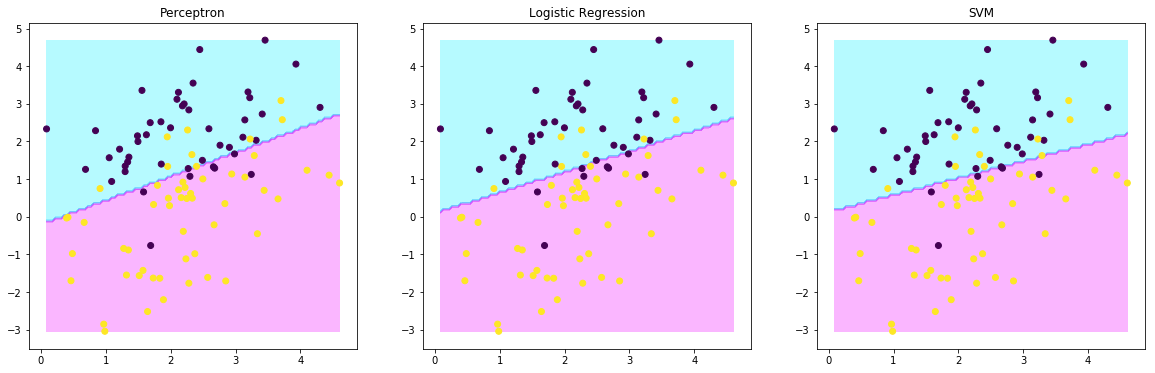

In [30]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

# Replace next three lines with code for learning w using the three methods
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w_perceptron = w[:,np.newaxis]
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w_logistic = np.reshape(w,[len(w),1])
w_svm = trainSGDSVM(Xtrain_i,ytrain,200,0.01)
fig = plt.figure(figsize=(20,6))

ax = plt.subplot(1,3,1)
plotBoundaries(w_perceptron,Xtrain_i,ytrain)
ax.set_title('Perceptron')

ax = plt.subplot(1,3,2)
plotBoundaries(w_logistic,Xtrain_i,ytrain)
ax.set_title('Logistic Regression')

ax = plt.subplot(1,3,3)
plotBoundaries(w_svm,Xtrain_i,ytrain)
ax.set_title('SVM')